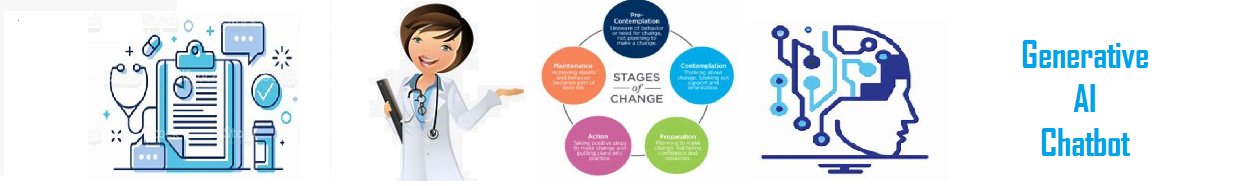

In [6]:
import tkinter as tk
from tkinter import scrolledtext

# Define colors and icons
USER_COLOR = 'blue'
BOT_COLOR = 'brown'
USER_ICON = '👤'
BOT_ICON = '🤖'

class ChatInterface:

    def __init__(self, master):
        self.master = master
        master.title("AI Health Coach")
        master.geometry("400x600")
        
                # Create menu bar
        menu_bar = tk.Menu(master)
        master.config(menu=menu_bar)

        # Create theme menu
        theme_menu = tk.Menu(menu_bar, tearoff=0)
        theme_menu.add_radiobutton(label="Light Mode", command=self.set_light_mode)
        theme_menu.add_radiobutton(label="Dark Mode", command=self.set_dark_mode)
        theme_menu.add_radiobutton(label="Pastel", command=self.set_pastel_mode)
        menu_bar.add_cascade(label="Theme", menu=theme_menu)

        # Create font menu
        font_menu = tk.Menu(menu_bar, tearoff=0)
        font_menu.add_radiobutton(label="Arial", command=self.set_font)
        font_menu.add_radiobutton(label="Courier New", command=self.set_font)
        font_menu.add_radiobutton(label="Verdana", command=self.set_font)
        menu_bar.add_cascade(label="Font", menu=font_menu)

        # Create font size menu
        font_size_menu = tk.Menu(menu_bar, tearoff=0)
        font_size_menu.add_radiobutton(label="10", command=self.set_font_size)
        font_size_menu.add_radiobutton(label="12", command=self.set_font_size)
        font_size_menu.add_radiobutton(label="14", command=self.set_font_size)
        menu_bar.add_cascade(label="Font Size", menu=font_size_menu)

        # Create scrolled text box to house the chat history
        self.history = scrolledtext.ScrolledText(master, width=50, height=30)
        self.history.grid(row=0, column=0, padx=10, pady=10)

        # Create input text box and submit button
        input_frame = tk.Frame(master)
        input_frame.grid(row=1, column=0, padx=10, pady=10, sticky="ew")
        self.input = tk.Entry(input_frame, width=40)
        self.input.pack(side="left", padx=5)
        self.submit_button = tk.Button(input_frame, text="Submit", command=self.submit_message)
        self.submit_button.pack(side="left", padx=5)

        # Initialize chat history
        self.history.insert(tk.END, "AI Health Coach: Hi, I'm your AI health coach. How can I help you today?\n")

    def set_light_mode(self):
        self.history.configure(bg="white", fg="black")
        self.input.configure(bg="white", fg="black")

    def set_dark_mode(self):
        self.history.configure(bg="black", fg="white")
        self.input.configure(bg="black", fg="white")

    def set_pastel_mode(self):
        self.history.configure(bg="#F3EFEF", fg="black")
        self.input.configure(bg="#F3EFEF", fg="black")

    def set_font(self):
        # TODO: Add code to set the font
        pass

    def set_font_size(self):
        # TODO: Add code to set the font size
        pass

        # Create scrolled text box to house the chat history
        self.history = scrolledtext.ScrolledText(master, width=50, height=30)
        self.history.grid(row=0, column=0, padx=10, pady=10)

        # Create input text box and submit button
        input_frame = tk.Frame(master)
        input_frame.grid(row=1, column=0, padx=10, pady=10, sticky="ew")
        self.input = tk.Entry(input_frame, width=40)
        self.input.pack(side="left", padx=5)
        self.submit_button = tk.Button(input_frame, text="Submit", command=self.submit_message)
        self.submit_button.pack(side="left", padx=5)

        # Initialize chat history
        user_icon = PhotoImage(file="chat_bot.png")
        chatbot_icon = PhotoImage(file="chatuser.png")
        self.history.image_create(tk.END, image=chatbot_icon)
        self.history.insert(tk.END, " AI Health Coach: Hi, I'm your AI health coach. How can I help you today?\n")
        self.history.image_create(tk.END, image=user_icon)

    def submit_message(self):
        message = self.input.get()
        self.input.delete(0, tk.END)
        self.history.insert(tk.END,f'\n  {USER_ICON} You: {message}\n', 'red')
        

#         chat_history_area.config(state='normal')
#         chat_history_area.insert(tk.END, chat_history, BOT_COLOR)
        # TODO: Use a chatbot library to generate a response
        self.history.insert(tk.END, f'\n {BOT_ICON} Health Coach: {message}\n', 'green')

root = tk.Tk()
chat_interface = ChatInterface(root)
root.mainloop()


In [2]:
import tkinter as tk
from tkinter import ttk

# Create a main windowpaint
root = tk.Tk()
root.geometry('400x600')
root.title('AI Health Coach')

# Create a scrollable text box for the chat history
history_frame = ttk.Frame(root, padding='3 3 12 12')
history_frame.grid(column=0, row=0, sticky='nsew')
history_frame.columnconfigure(0, weight=1)
history_frame.rowconfigure(0, weight=1)

history_scroll = tk.Scrollbar(history_frame)
history_scroll.grid(column=1, row=0, sticky='nsew')

history_text = tk.Text(history_frame, yscrollcommand=history_scroll.set, wrap='word', state='disabled')
history_text.grid(column=0, row=0, sticky='nsew')

history_scroll.config(command=history_text.yview)

# Create a smaller user input text box and a submit button
input_frame = ttk.Frame(root, padding='3 3 12 12')
input_frame.grid(column=0, row=1, sticky='nsew')

input_text = tk.Text(input_frame, height=3, wrap='word')
input_text.grid(column=0, row=0, sticky='nsew')

submit_button = ttk.Button(input_frame, text='Submit')
submit_button.grid(column=1, row=0, sticky='e')

# Create icons for user and chatbot messages
user_icon = tk.PhotoImage(file='user_icon.png')
chatbot_icon = tk.PhotoImage(file='chatbot_icon.png')

# Function to add a message to the chat history
def add_message(text, icon):
    history_text.configure(state='normal')
    history_text.window_create('end', window=icon)
    history_text.insert('end', ' ')
    history_text.insert('end', text + '\n')
    history_text.configure(state='disabled')
    history_text.see('end')

# Function to handle user input
def handle_input():
    user_text = input_text.get('1.0', 'end-1c')
    if user_text:
        add_message(user_text, user_icon)
        # TODO: Add chatbot response here
        input_text.delete('1.0', 'end')

submit_button.config(command=handle_input)

# Start the main loop
root.mainloop()


TclError: couldn't open "user_icon.png": no such file or directory

In [3]:
import tkinter as tk
from tkinter import ttk

# Define the chatbot window
window = tk.Tk()
window.title("AI Health Coach")
window.geometry("400x600")

# Define a function to handle user input
def submit_message():
    # Get the user input text
    user_input = user_input_box.get()

    # Add the user input to the chat history text box
    chat_history_box.insert(tk.END, "User: " + user_input + "\n", "blue_tag")

    # Clear the user input box
    user_input_box.delete(0, tk.END)

    # TODO: Add chatbot response to chat history box

# Define a function to change the window theme
def change_theme(theme):
    window.configure(background=theme)

# Define a function to change the font
def change_font(font):
    chat_history_box.configure(font=font)

# Define a function to change the font size
def change_font_size(size):
    font = chat_history_box.cget("font")
    font_family = font.split(" ")[0]
    chat_history_box.configure(font=(font_family, size))

# Create the drop down menus
themes_menu = ttk.Combobox(window, values=["white", "black", "gray"], command=change_theme)
themes_menu.current(0)
themes_menu.place(x=10, y=10)

font_menu = ttk.Combobox(window, values=["Arial", "Helvetica", "Times New Roman"], command=change_font)
font_menu.current(0)
font_menu.place(x=120, y=10)

font_size_menu = ttk.Combobox(window, values=["10", "12", "14", "16", "18", "20"], command=change_font_size)
font_size_menu.current(0)
font_size_menu.place(x=240, y=10)

# Create the chat history text box
chat_history_box = tk.Text(window, height=25, width=50, wrap=tk.WORD)
chat_history_box.place(x=10, y=50)

# Add the chat history tags for user and chatbot text
chat_history_box.tag_configure("blue_tag", foreground="blue")
chat_history_box.tag_configure("gold_tag", foreground="gold")

# Create the user input text box and submit button
user_input_box = tk.Entry(window, width=40)
user_input_box.place(x=10, y=550)

submit_button = tk.Button(window, text="Submit", command=submit_message)
submit_button.place(x=310, y=550)

# Start the chatbot interface
window.mainloop()


TclError: unknown option "-command"

In [5]:
import tkinter as tk
from tkinter import ttk

class ChatbotInterface:

    def __init__(self, master):
        self.master = master
        master.title("AI Health Coach")
        master.geometry("400x600")

        # Menu bar
        self.menu_bar = tk.Menu(master)
        self.theme_menu = tk.Menu(self.menu_bar, tearoff=0)
        self.theme_menu.add_command(label="Default")
        self.theme_menu.add_command(label="Dark")
        self.menu_bar.add_cascade(label="Theme", menu=self.theme_menu)
        self.font_menu = tk.Menu(self.menu_bar, tearoff=0)
        self.font_menu.add_command(label="Default")
        self.font_menu.add_command(label="Arial")
        self.font_menu.add_command(label="Helvetica")
        self.menu_bar.add_cascade(label="Font", menu=self.font_menu)
        self.font_size_menu = tk.Menu(self.menu_bar, tearoff=0)
        self.font_size_menu.add_command(label="Default")
        self.font_size_menu.add_command(label="10")
        self.font_size_menu.add_command(label="12")
        self.font_size_menu.add_command(label="14")
        self.menu_bar.add_cascade(label="Font Size", menu=self.font_size_menu)
        master.config(menu=self.menu_bar)

        # Chat history
        self.history_text = tk.Text(master, height=25, width=50)
        self.history_text.tag_configure("user", foreground="blue")
        self.history_text.tag_configure("chatbot", foreground="gold")
        self.history_text.config(state=tk.DISABLED)
        self.history_scroll = tk.Scrollbar(master)
        self.history_scroll.config(command=self.history_text.yview)
        self.history_text.config(yscrollcommand=self.history_scroll.set)
        self.history_text.pack(side=tk.TOP)
        self.history_scroll.pack(side=tk.RIGHT, fill=tk.Y)

        # User input
        self.input_text = tk.Text(master, height=3, width=50)
        self.input_text.pack(side=tk.LEFT)
        self.input_button = tk.Button(master, text="Submit", command=self.submit_input)
        self.input_button.pack(side=tk.RIGHT)

    def submit_input(self):
        user_input = self.input_text.get("1.0", tk.END).strip()
        self.input_text.delete("1.0", tk.END)
        self.add_message(user_input, "blue", "user")

    def add_message(self, message, color, sender):
        self.history_text.config(state=tk.NORMAL)
        if sender == "user":
            icon = tk.PhotoImage(file="user_icon.png")
        else:
            icon = tk.PhotoImage(file="chatbot_icon.png")
        self.history_text.image_create(tk.END, image=icon)
        self.history_text.insert(tk.END, " " + message + "\n", sender)
        self.history_text.config(state=tk.DISABLED)


root = tk.Tk()
app = ChatbotInterface(root)
root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk

class ChatbotInterface(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.master = master
        self.master.geometry("400x600")
        self.master.title("Chatbot Interface")
        
        # Create a single drop-down menu to change window theme, font, and font size
         # Create a menu bar
        self.menu_bar = tk.Menu(self.master)
        self.master.config(menu=self.menu_bar)
        
        # Create a theme menu
        self.theme_menu = tk.Menu(self.menu_bar, tearoff=0)
        self.menu_bar.add_cascade(label="Theme", menu=self.theme_menu)
        self.theme_var = tk.StringVar(value="default")
        self.theme_menu.add_radiobutton(label="Default", variable=self.theme_var, value="default")
        self.theme_menu.add_radiobutton(label="Dark", variable=self.theme_var, value="dark")
        
        # Create a font menu
        self.font_menu = tk.Menu(self.menu_bar, tearoff=0)
        self.menu_bar.add_cascade(label="Font", menu=self.font_menu)
        self.font_var = tk.StringVar(value="Arial")
        self.font_menu.add_radiobutton(label="Arial", variable=self.font_var, value="Arial")
        self.font_menu.add_radiobutton(label="Times New Roman", variable=self.font_var, value="Times New Roman")
        self.font_menu.add_radiobutton(label="Courier New", variable=self.font_var, value="Courier New")
        
        # Create a font size menu
        self.font_size_menu = tk.Menu(self.menu_bar, tearoff=0)
        self.menu_bar.add_cascade(label="Font Size", menu=self.font_size_menu)
        self.font_size_var = tk.StringVar(value="12")
        self.font_size_menu.add_radiobutton(label="10", variable=self.font_size_var, value="10")
        self.font_size_menu.add_radiobutton(label="12", variable=self.font_size_var, value="12")
        self.font_size_menu.add_radiobutton(label="14", variable=self.font_size_var, value="14")
        self.font_size_menu.add_radiobutton(label="16", variable=self.font_size_var, value="16")

        self.option_menu.pack()
        
        # Create a scrollable text box for chat history
        self.history_text = tk.Text(self.master, wrap="word", state="disabled")
        self.history_text.pack(fill="both", expand=True)
        
        # Create a smaller user input text box and submit button
        self.input_text = tk.Entry(self.master)
        self.input_text.pack(side="left", fill="x", expand=True)
        self.submit_button = tk.Button(self.master, text="Submit", command=self.submit_input)
        self.submit_button.pack(side="right")
        
        # Bind the "Enter" key to the submit button
        self.master.bind("<Return>", lambda event: self.submit_input())
    
    def submit_input(self):
        # Get the user input and clear the input text box
        user_input = self.input_text.get()
        self.input_text.delete(0, "end")
        
        # Add the user input to the chat history text box
        self.history_text.configure(state="normal")
        self.history_text.insert("end", f"User: {user_input}\n")
        self.history_text.configure(state="disabled")
        
        # TODO: Process the user input with the chatbot and add the bot's response to the chat history text box
        # For now, just echo the user's input
        self.history_text.configure(state="normal")
        self.history_text.insert("end", f"Chatbot: {user_input}\n")
        self.history_text.configure(state="disabled")

# Create and run the chatbot interface
root = tk.Tk()
app = ChatbotInterface(root)
app.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk

class ChatbotInterface(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.master = master
        self.master.geometry("400x600")
        self.master.title("Chatbot Interface")
        
        # Create a menu bar
        self.menu_bar = tk.Menu(self.master)
        self.master.config(menu=self.menu_bar)
        
        # Create a theme menu
        self.theme_menu = tk.Menu(self.menu_bar, tearoff=0)
        self.menu_bar.add_cascade(label="Theme", menu=self.theme_menu)
        self.theme_var = tk.StringVar(value="default")
        self.theme_menu.add_radiobutton(label="Default", variable=self.theme_var, value="default")
        self.theme_menu.add_radiobutton(label="Dark", variable=self.theme_var, value="dark")
        
        # Create a font menu
        self.font_menu = tk.Menu(self.menu_bar, tearoff=0)
        self.menu_bar.add_cascade(label="Font", menu=self.font_menu)
        self.font_var = tk.StringVar(value="Arial")
        self.font_menu.add_radiobutton(label="Arial", variable=self.font_var, value="Arial")
        self.font_menu.add_radiobutton(label="Times New Roman", variable=self.font_var, value="Times New Roman")
        self.font_menu.add_radiobutton(label="Courier New", variable=self.font_var, value="Courier New")
        
        # Create a font size menu
        self.font_size_menu = tk.Menu(self.menu_bar, tearoff=0)
        self.menu_bar.add_cascade(label="Font Size", menu=self.font_size_menu)
        self.font_size_var = tk.StringVar(value="12")
        self.font_size_menu.add_radiobutton(label="10", variable=self.font_size_var, value="10")
        self.font_size_menu.add_radiobutton(label="12", variable=self.font_size_var, value="12")
        self.font_size_menu.add_radiobutton(label="14", variable=self.font_size_var, value="14")
        self.font_size_menu.add_radiobutton(label="16", variable=self.font_size_var, value="16")
        
        # Create a scrollable text box for chat history
        self.history_text = tk.Text(self.master, wrap="word", state="disabled")
        self.history_text.pack(fill="both", expand=True)
        
        # Create a smaller user input text box and submit button
        self.input_text = tk.Entry(self.master)
        self.input_text.pack(side="left", fill="x", expand=True)
        self.submit_button = tk.Button(self.master, text="Submit", command=self.submit_input)
        self.submit_button.pack(side="right")
        
        # Bind the "Enter" key to the submit button
        self.master.bind("<Return>", lambda event: self.submit_input())
    
    def submit_input(self):
        # Get the user input and clear the input text box
        user_input = self.input_text.get()
        self.input_text.delete(0, "end")
        
        # Add the user input to the chat history text box
        self.history_text.configure(state="normal")
        self.history_text.insert("end", f"User: {user_input}\n")
        self.history_text.configure(state="disabled")
        
        # TODO: Process the user input with the chatbot and add the bot's response to the chat history text box
        # For now, just echo the user's input
        self.history_text.configure(state="normal")
        self.history_text.insert("end", f"Chatbot: {user_input}\n")
        self.history_text.configure(state


In [ ]:
import tkinter as tk
from tkinter import ttk

class ChatbotInterface(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.master = master
        self.master.geometry("400x600")
        self.master.title("Chatbot Interface")
        
        # Create a drop-down menu to change window theme
        self.theme_var = tk.StringVar(value="default")
        self.theme_menu = ttk.OptionMenu(self.master, self.theme_var, "default", "default", "dark")
        self.theme_menu.pack()
        
        # Create a drop-down menu to change font
        self.font_var = tk.StringVar(value="Arial")
        self.font_menu = ttk.OptionMenu(self.master, self.font_var, "Arial", "Arial", "Times New Roman", "Courier New")
        self.font_menu.pack()
        
        # Create a drop-down menu to change font size
        self.font_size_var = tk.StringVar(value="12")
        self.font_size_menu = ttk.OptionMenu(self.master, self.font_size_var, "12", "10", "12", "14", "16")
        self.font_size_menu.pack()
        
        # Create a scrollable text box for chat history
        self.history_text = tk.Text(self.master, wrap="word", state="disabled")
        self.history_text.pack(fill="both", expand=True)
        
        # Create a smaller user input text box and submit button
        self.input_text = tk.Entry(self.master)
        self.input_text.pack(side="left", fill="x", expand=True)
        self.submit_button = tk.Button(self.master, text="Submit", command=self.submit_input)
        self.submit_button.pack(side="right")
        
        # Bind the "Enter" key to the submit button
        self.master.bind("<Return>", lambda event: self.submit_input())
    
    def submit_input(self):
        # Get the user input and clear the input text box
        user_input = self.input_text.get()
        self.input_text.delete(0, "end")
        
        # Add the user input to the chat history text box
        self.history_text.configure(state="normal")
        self.history_text.insert("end", f"User: {user_input}\n")
        self.history_text.configure(state="disabled")
        
        # TODO: Process the user input with the chatbot and add the bot's response to the chat history text box
        # For now, just echo the user's input
        self.history_text.configure(state="normal")
        self.history_text.insert("end", f"Chatbot: {user_input}\n")
        self.history_text.configure(state="disabled")

# Create and run the chatbot interface
root = tk.Tk()
app = ChatbotInterface(root)
app.mainloop()


In [ ]:
import json

# Define the survey questions and responses
survey = {
    "questions": [
        {
            "question_id": 1,
            "question_text": "How much do you know about the benefits of behavior change?",
            "responses": [
                {"response_number": 1, "response_text": "I don't know anything", "response_score": 0},
                {"response_number": 2, "response_text": "I know a little", "response_score": 1},
                {"response_number": 3, "response_text": "I know some", "response_score": 2},
                {"response_number": 4, "response_text": "I know a lot", "response_score": 3}
            ]
        },
        {
            "question_id": 2,
            "question_text": "How important is it for you to make a change in your behavior?",
            "responses": [
                {"response_number": 1, "response_text": "Not at all important", "response_score": 0},
                {"response_number": 2, "response_text": "Somewhat important", "response_score": 1},
                {"response_number": 3, "response_text": "Important", "response_score": 2},
                {"response_number": 4, "response_text": "Very important", "response_score": 3}
            ]
        },
        {
            "question_id": 3,
            "question_text": "How confident are you in your ability to make a change in your behavior?",
            "responses": [
                {"response_number": 1, "response_text": "Not at all confident", "response_score": 0},
                {"response_number": 2, "response_text": "Somewhat confident", "response_score": 1},
                {"response_number": 3, "response_text": "Confident", "response_score": 2},
                {"response_number": 4, "response_text": "Very confident", "response_score": 3}
            ]
        },
        {
            "question_id": 4,
            "question_text": "How ready are you to make a change in your behavior?",
            "responses": [
                {"response_number": 1, "response_text": "Not at all ready", "response_score": 0},
                {"response_number": 2, "response_text": "Somewhat ready", "response_score": 1},
                {"response_number": 3, "response_text": "Ready", "response_score": 2},
                {"response_number": 4, "response_text": "Very ready", "response_score": 3}
            ]
        },
        {
            "question_id": 5,
            "question_text": "What barriers are preventing you from making a change in your behavior?",
            "responses": [
                {"response_number": 1, "response_text": "I don't know", "response_score": 0},
                {"response_number": 2, "response_text": "Lack of motivation", "response_score": 1},
                {"response_number": 3, "response_text": "Lack of knowledge", "response_score": 2},
                {"response_number": 4, "response_text": "Lack of support", "response_score": 3}
            ]
        },
        {
            "question_id": 6,
            "question_text": "What resources do you need to make a change in your behavior?",
            "responses": [
                {"response_number": 1, "response_text": "


In [ ]:
import json

# Define the survey questions and responses
survey_questions = [
    {
        "question_id": 1,
        "question_text": "How old are you?",
        "responses": [
            {"response_number": 1, "response_text": "Under 18", "response_score": 0},
            {"response_number": 2, "response_text": "18-44", "response_score": 0},
            {"response_number": 3, "response_text": "45-64", "response_score": 5},
            {"response_number": 4, "response_text": "65 or older", "response_score": 9}
        ]
    },
    {
        "question_id": 2,
        "question_text": "Are you a male or female?",
        "responses": [
            {"response_number": 1, "response_text": "Male", "response_score": 0},
            {"response_number": 2, "response_text": "Female", "response_score": 3}
        ]
    },
    {
        "question_id": 3,
        "question_text": "What is your height and weight?",
        "responses": [
            {"response_number": 1, "response_text": "Less than 4'10'' and under 91 lbs", "response_score": 5},
            {"response_number": 2, "response_text": "4'10'' to 5'2'' and under 119 lbs", "response_score": 3},
            {"response_number": 3, "response_text": "5'3'' to 5'6'' and under 140 lbs", "response_score": 1},
            {"response_number": 4, "response_text": "5'7'' and above and over 140 lbs", "response_score": 0}
        ]
    },
    {
        "question_id": 4,
        "question_text": "Have you ever been diagnosed with high blood pressure?",
        "responses": [
            {"response_number": 1, "response_text": "No", "response_score": 0},
            {"response_number": 2, "response_text": "Yes", "response_score": 5}
        ]
    },
    {
        "question_id": 5,
        "question_text": "Have you ever been diagnosed with gestational diabetes?",
        "responses": [
            {"response_number": 1, "response_text": "No", "response_score": 0},
            {"response_number": 2, "response_text": "Yes", "response_score": 5}
        ]
    },
    {
        "question_id": 6,
        "question_text": "Are you physically active?",
        "responses": [
            {"response_number": 1, "response_text": "No", "response_score": 5},
            {"response_number": 2, "response_text": "Yes, less than 150 minutes per week", "response_score": 5},
            {"response_number": 3, "response_text": "Yes, 150 minutes or more per week", "response_score": 0}
        ]
    },
    {
        "question_id": 7,
        "question_text": "What is your family history of diabetes?",
        "responses": [
            {"response_number": 1, "response_text": "No family members with diabetes", "response_score": 0},
            {"response_number": 2, "response_text": "One or more family members with diabetes", "response_score": 


In [ ]:
import json

# Define the survey questions and responses
survey_questions = [
    {
        "question_id": 1,
        "question_text": "How old are you?",
        "responses": [
            {"response_number": 1, "response_text": "Under 18", "response_score": 0},
            {"response_number": 2, "response_text": "18-44", "response_score": 0},
            {"response_number": 3, "response_text": "45-64", "response_score": 5},
            {"response_number": 4, "response_text": "65 or older", "response_score": 9}
        ]
    },
    {
        "question_id": 2,
        "question_text": "Are you a male or female?",
        "responses": [
            {"response_number": 1, "response_text": "Male", "response_score": 0},
            {"response_number": 2, "response_text": "Female", "response_score": 3}
        ]
    },
    {
        "question_id": 3,
        "question_text": "What is your height and weight?",
        "responses": [
            {"response_number": 1, "response_text": "Less than 4'10'' and under 91 lbs", "response_score": 5},
            {"response_number": 2, "response_text": "4'10'' to 5'2'' and under 119 lbs", "response_score": 3},
            {"response_number": 3, "response_text": "5'3'' to 5'6'' and under 140 lbs", "response_score": 1},
            {"response_number": 4, "response_text": "5'7'' and above and over 140 lbs", "response_score": 0}
        ]
    },
    {
        "question_id": 4,
        "question_text": "Have you ever been diagnosed with high blood pressure?",
        "responses": [
            {"response_number": 1, "response_text": "No", "response_score": 0},
            {"response_number": 2, "response_text": "Yes", "response_score": 5}
        ]
    },
    {
        "question_id": 5,
        "question_text": "Have you ever been diagnosed with gestational diabetes?",
        "responses": [
            {"response_number": 1, "response_text": "No", "response_score": 0},
            {"response_number": 2, "response_text": "Yes", "response_score": 5}
        ]
    },
    {
        "question_id": 6,
        "question_text": "What is your physical activity level?",
        "responses": [
            {"response_number": 1, "response_text": "Inactive or sedentary", "response_score": 5},
            {"response_number": 2, "response_text": "Moderately active (exercise less than 3 times per week)", "response_score": 3},
            {"response_number": 3, "response_text": "Active (exercise 3 or more times per week)", "response_score": 0}
        ]
    }
    {
        "question_id": 7,
        "question_text": "What is your family history of diabetes?",
        "responses": [
            {"response_number": 1, "response_text": "No family members with diabetes", "response_score": 0},
            {"response_number": 2, "response_text": "One or more family members with diabetes", "response_score":2} 
        ]
    }    
]

# Create the survey dictionary
survey = {"questions": survey_questions}

# Write the survey to a JSON file
with open('survey_diabetes_risk.json', 'w') as f:
    json.dump(survey, f)


In [ ]:
import tkinter as tk
import json

# Define colors and icons
USER_COLOR = 'blue'
BOT_COLOR = 'brown'
USER_ICON = '👤'
BOT_ICON = '🤖'

# Load questions from JSON file
with open('questions.json') as f:
    questions = json.load(f)

# Initialize variables
current_question = 0
chat_history = ''

# Define functions
def submit_response():
    global current_question, chat_history
    
    # Get user response
    user_response = user_input.get('1.0', 'end-1c')
    user_input.delete('1.0', tk.END)
    
    # Display user response in chat history
    chat_history += f'{USER_ICON} {user_response}\n'
    chat_history_area.config(state='normal')
    chat_history_area.insert(tk.END, chat_history, USER_COLOR)
    chat_history_area.config(state='disabled')
    chat_history_area.see(tk.END)
    
    # Get next question
    current_question += 1
    if current_question < len(questions):
        next_question = questions[current_question]['question']
        chat_history += f'{BOT_ICON} {next_question}\n'
        chat_history_area.config(state='normal')
        chat_history_area.insert(tk.END, chat_history, BOT_COLOR)
        chat_history_area.config(state='disabled')
        chat_history_area.see(tk.END)

def change_theme(theme):
    # Change theme
    root.config(bg=theme)
    chat_history_area.config(bg=theme)
    user_input.config(bg=theme)
    bot_input.config(bg=theme)
    submit_button.config(bg=theme)
    theme_menu.config(bg=theme)

def change_font(font):
    # Change font
    chat_history_area.config(font=font)
    user_input.config(font=font)
    bot_input.config(font=font)

# Create main window
root = tk.Tk()
root.title('AI Health Coach')
root.geometry('400x600')

# Create chat history area
chat_history_area = tk.scrolledtext.ScrolledText(root, wrap=tk.WORD, height=20)
chat_history_area.pack(fill=tk.BOTH, expand=True)

# Create user input area
user_input = tk.Text(root, wrap=tk.WORD, height=3)
user_input.pack(fill=tk.X)

# Create bot input area
bot_input = tk.scrolledtext.ScrolledText(root, wrap=tk.WORD, height=3)
bot_input.pack(fill=tk.BOTH, expand=True)

# Create submit button
submit_button = tk.Button(root, text='Submit', command=submit_response)
submit_button.pack(fill=tk.X)

# Create theme menu
theme_var = tk.StringVar(root, value='white')
theme_menu = tk.OptionMenu(root, theme_var, 'white', 'gray', 'black', command=change_theme)
theme_menu.pack()

# Create font menu
font_var = tk.StringVar(root, value='TkDefaultFont')
font_menu = tk.OptionMenu(root, font_var, 'TkDefaultFont', 'Arial', 'Times New Roman', command=change_font)
font_menu.pack()

# Display first question
next_question = questions[current_question]['question']
chat_history += f'{BOT_ICON} {next_question}\n'
chat_history_area.config(state='normal')
chat_history_area.insert(tk.END, chat_history, BOT_COLOR)
chat_history_area.config(state='disabled')
chat_history_area.see(tk.END)

root.mainloop()



In [ ]:
import json
import os

# Get the absolute path of the questions.json file
dir_path = os.path.dirname(os.path.realpath(__file__))
file_path = os.path.join(dir_path, "questions.json")

# Open the file and load the questions
with open(file_path, "r") as f:
    questions = json.load(f)


In [ ]:
import tkinter as tk
from tkinter import ttk

# sample survey questions with options and scores
survey_questions = {
    "How often do you exercise?": {
        "options": {
            "Less than once a week": 0,
            "1-2 times a week": 1,
            "3-4 times a week": 2,
            "5 or more times a week": 3
        }
    },
    "How many servings of fruits and vegetables do you eat per day?": {
        "options": {
            "Less than 2 servings": 0,
            "2-3 servings": 1,
            "4-5 servings": 2,
            "More than 5 servings": 3
        }
    },
    "How many hours of sleep do you get per night?": {
        "options": {
            "Less than 6 hours": 0,
            "6-7 hours": 1,
            "7-8 hours": 2,
            "More than 8 hours": 3
        }
    },
    "Do you smoke?": {
        "options": {
            "Yes": 0,
            "No": 1
        }
    },
    "How often do you drink alcohol?": {
        "options": {
            "Never": 0,
            "Less than once a week": 1,
            "1-2 times a week": 2,
            "More than 2 times a week": 3
        }
    }
}

class AIHealthCoach:
    def __init__(self, master):
        self.master = master
        self.master.title("AI Health Coach")
        self.master.geometry("400x600")

        # create style dropdown menu
        self.style_var = tk.StringVar(value="default")
        self.style_label = ttk.Label(self.master, text="Select Theme:")
        self.style_label.pack(side=tk.TOP, padx=10, pady=5)
        self.style_dropdown = ttk.Combobox(
            self.master, textvariable=self.style_var, values=["default", "clam", "alt", "classic", "vista"])
        self.style_dropdown.pack(side=tk.TOP, padx=10, pady=5)
        self.style_dropdown.bind("<<ComboboxSelected>>", self.change_style)

        # create font dropdown menu
        self.font_var = tk.StringVar(value="Arial")
        self.font_size_var = tk.StringVar(value="12")
        self.font_label = ttk.Label(self.master, text="Select Font:")
        self.font_label.pack(side=tk.TOP, padx=10, pady=5)
        self.font_dropdown = ttk.Combobox(self.master, textvariable=self.font_var, values=["Arial", "Times New Roman", "Helvetica"])
        self.font_dropdown.pack(side=tk.TOP, padx=10, pady=5)
        self.font_dropdown.bind("<<ComboboxSelected>>", self.change_font)

        # create font size dropdown menu
        self.font_size_label = ttk.Label(self.master, text="Select Font Size:")
        self.font_size_label.pack(side=tk.TOP, padx=10, pady=5)
        self.font_size_dropdown = ttk.Combobox(self.master, textvariable=self.font_size_var, values=["10", "12", "14", "16"])
        self.font_size_dropdown.pack(side=tk.TOP, padx=10, pady=5)
        self.font_size_dropdown.bind("<<ComboboxSelected>>", self.change_font_size)

        # create chat history text area
        self.chat_history = tk.Text(self.master, state=tk.DISABLED, height=10, wrap=tk


In [ ]:
import tkinter as tk
from tkinter import ttk

class ChatBotInterface:
    def __init__(self, master):
        self.master = master
        self.master.geometry("400x600")
        self.master.title("AI bot")
        self.font_size = tk.StringVar(value="12")
        self.font_style = tk.StringVar(value="TkDefaultFont")
        self.style = ttk.Style()
        self.log = tk.Text(self.master, state='disabled', width=40, height=20)
        self.log.pack(fill='both', expand=True, padx=10, pady=10)
        self.log.tag_configure("bot", foreground="gold")
        self.log.tag_configure("user", foreground="blue")
        self.entry_frame = tk.Frame(self.master)
        self.entry_frame.pack(fill='x', padx=10, pady=10)
        self.entry = tk.Text(self.entry_frame, width=30, height=5)
        self.entry.pack(side='left', fill='both', expand=True)
        self.submit_button = tk.Button(self.entry_frame, text="Submit", command=self.submit_response)
        self.submit_button.pack(side='left', padx=5, pady=5, ipady=10)
        self.create_menu()

    def create_menu(self):
        menu = tk.Menu(self.master)
        self.master.config(menu=menu)
        font_menu = tk.Menu(menu, tearoff=False)
        style_menu = tk.Menu(menu, tearoff=False)
        menu.add_cascade(label="Font Size", menu=font_menu)
        menu.add_cascade(label="Font Style", menu=style_menu)
        for size in range(8, 20, 2):
            font_menu.add_radiobutton(label=size, variable=self.font_size,
                                      command=self.change_font_size)
        for font in ["TkDefaultFont", "Helvetica", "Times", "Courier"]:
            style_menu.add_radiobutton(label=font, variable=self.font_style,
                                       command=self.change_font_style)
        style_menu.add_separator()
        for style in self.style.theme_names():
            style_menu.add_radiobutton(label=style, command=lambda s=style: self.change_style(s))

    def change_font_size(self):
        self.log.config(font=(self.font_style.get(), int(self.font_size.get())))
        self.entry.config(font=(self.font_style.get(), int(self.font_size.get())))

    def change_font_style(self):
        self.log.config(font=(self.font_style.get(), int(self.font_size.get())))
        self.entry.config(font=(self.font_style.get(), int(self.font_size.get())))

    def change_style(self, style_name):
        self.style.theme_use(style_name)

    def submit_response(self):
        user_input = self.entry.get("1.0", "end-1c")
        if user_input.strip() != "":
            self.log.configure(state='normal')
            self.log.insert(tk.END, "\nUser: " + user_input, "user")
            self.log.configure(state='disabled')
            self.entry.delete("1.0", "end")

    def run(self):
        self.master.mainloop()

root = tk.Tk()
ChatBotInterface(root).run()


In [ ]:
import json
import sqlite3
import speech_recognition as sr
import pyttsx3
import pandas as pd
from datetime import datetime
import tkinter as tk

# Load the survey questions from a JSON file
with open('survey_questions.json') as f:
    survey_questions = json.load(f)

# Connect to the SQLite3 database
conn = sqlite3.connect('health_survey.db')
c = conn.cursor()

# Create the database table if it doesn't already exist
c.execute('''CREATE TABLE IF NOT EXISTS survey_responses
             (timestamp TEXT, user_id INTEGER, question_id INTEGER, answer TEXT)''')

# Initialize a Pandas dataframe to store the user's responses
df_responses = pd.DataFrame(columns=['timestamp', 'user_id', 'question_id', 'answer'])

# Initialize the speech recognition and text-to-speech engines
r = sr.Recognizer()
engine = pyttsx3.init()

# Initialize the tkinter window and label
window = tk.Tk()
label = tk.Label(text="Press the button to start the survey!")
label.pack()

# Define a function to speak a question and listen for a response
def ask_question(question):
    with sr.Microphone() as source:
        print(question['text'])
        engine.say(question['text'])
        engine.runAndWait()
        audio = r.listen(source)
        try:
            answer = r.recognize_google(audio)
            return answer
        except:
            return None

# Define a function to start the survey
def start_survey():
    # Ask the user for their ID
    user_id = input('Enter your user ID: ')

    # Ask each survey question and store the user's response
    for question in survey_questions:
        answer = None
        while not answer:
            answer = ask_question(question)
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        c.execute("INSERT INTO survey_responses VALUES (?, ?, ?, ?)",
                  (timestamp, user_id, question['id'], answer))
        conn.commit()
        df_responses = df_responses.append({'timestamp': timestamp,
                                            'user_id': user_id,
                                            'question_id': question['id'],
                                            'answer': answer}, ignore_index=True)

    # Print the user's responses
    print('User responses:')
    for question in survey_questions:
        c.execute("SELECT answer FROM survey_responses WHERE user_id=? AND question_id=? ORDER BY timestamp DESC LIMIT 1",
                  (user_id, question['id']))
        response = c.fetchone()
        if response:
            print(question['text'] + ': ' + response[0])

    # Close the database connection
    conn.close()

# Add a button to start the survey
button = tk.Button(text="Start survey", command=start_survey)
button.pack()

# Start the tkinter event loop
window.mainloop()


In [ ]:
import json
import sqlite3
import speech_recognition as sr
import pyttsx3
import pandas as pd
from datetime import datetime
import tkinter as tk

# Load the survey questions from a JSON file
with open('survey_questions.json') as f:
    survey_questions = json.load(f)

# Connect to the SQLite3 database
conn = sqlite3.connect('health_survey.db')
c = conn.cursor()

# Create the database table if it doesn't already exist
c.execute('''CREATE TABLE IF NOT EXISTS survey_responses
             (timestamp TEXT, user_id INTEGER, question_id INTEGER, answer TEXT)''')

# Initialize a Pandas dataframe to store the user's responses
df_responses = pd.DataFrame(columns=['timestamp', 'user_id', 'question_id', 'answer'])

# Initialize the speech recognition and text-to-speech engines
r = sr.Recognizer()
engine = pyttsx3.init()

# Initialize the tkinter window and label
window = tk.Tk()
window.geometry("400x400")
window.title("Health Survey")

# Define a function to speak a question and listen for a response
def ask_question(question):
    with sr.Microphone() as source:
        # Speak the question
        icon_label.config(image=chatbot_icon)
        question_label.config(text=question['text'], fg='blue')
        engine.say(question['text'])
        engine.runAndWait()

        # Display the multiple choice options if present
        if 'options' in question:
            options = [f"{i}. {option}" for i, option in enumerate(question['options'], 1)]
            options_text = '\n'.join(options)
            options_label.config(text=options_text, fg='blue')
            engine.say("Your options are:")
            engine.runAndWait()
            for option in options:
                engine.say(option)
                engine.runAndWait()

        # Listen for the user's response
        audio = r.listen(source)
        try:
            answer = r.recognize_google(audio)
            return answer
        except:
            return None

# Define a function to start the survey
def start_survey():
    # Ask the user for their ID
    user_id = input('Enter your user ID: ')

    # Ask each survey question and store the user's response
    for question in survey_questions:
        # Ask the question and get the user's response
        answer = None
        while not answer:
            answer = ask_question(question)

        # Store the user's response in the database and dataframe
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        c.execute("INSERT INTO survey_responses VALUES (?, ?, ?, ?)",
                  (timestamp, user_id, question['id'], answer))
        conn.commit()
        df_responses = df_responses.append({'timestamp': timestamp,
                                            'user_id': user_id,
                                            'question_id': question['id'],
                                            'answer': answer}, ignore_index=True)

        # Display the user's response
        icon_label.config(image=user_icon)
        question_label.config(text=f"Your answer to '{question['text']}' was:", fg='green')
        answer_label.config(text=answer, fg='green')
        engine.say(f"Your answer to '{question['text']}' was:")
        engine.runAndWait()
        engine.say(answer)
        engine.runAndWait()

    # Print the user's responses
    print('User responses:')
    for question in survey_questions:
        c.execute("SELECT answer FROM survey_responses WHERE user_id=? AND question_id=? ORDER BY timestamp DESC LIMIT 1",
                  (user_id, question


In [ ]:
import tkinter as tk
from tkinter import messagebox
from PIL import ImageTk, Image

# Create the tkinter window
window = tk.Tk()
window.geometry("800x400")
window.title("Chatbot")

# Define the different styles and fonts that the user can choose from
styles = ['default', 'classic', 'alt', 'clam', 'vista', 'xpnative']
fonts = ['Arial', 'Calibri', 'Cambria', 'Helvetica', 'Tahoma', 'Verdana']

# Initialize the selected style and font to the default values
selected_style = tk.StringVar(value='default')
selected_font = tk.StringVar(value='Arial')

# Define a function to update the UI style
def update_style():
    style = selected_style.get()
    window.style = tk.ttk.Style()
    window.style.theme_use(style)

# Define a function to update the font
def update_font():
    font = selected_font.get()
    for widget in window.winfo_children():
        widget.configure(font=font)

# Create a frame to hold the UI style and font options
options_frame = tk.Frame(window)

# Create a label and dropdown for the UI style
style_label = tk.Label(options_frame, text="UI Style:")
style_label.pack(side=tk.LEFT)
style_dropdown = tk.ttk.Combobox(options_frame, textvariable=selected_style, values=styles, state='readonly')
style_dropdown.pack(side=tk.LEFT)
style_button = tk.Button(options_frame, text="Apply", command=update_style)
style_button.pack(side=tk.LEFT)

# Create a label and dropdown for the font
font_label = tk.Label(options_frame, text="Font:")
font_label.pack(side=tk.LEFT)
font_dropdown = tk.ttk.Combobox(options_frame, textvariable=selected_font, values=fonts, state='readonly')
font_dropdown.pack(side=tk.LEFT)
font_button = tk.Button(options_frame, text="Apply", command=update_font)
font_button.pack(side=tk.LEFT)

options_frame.pack()

# Create a frame to hold the chatbot and user icons
icons_frame = tk.Frame(window)

# Create an image for the chatbot icon
chatbot_icon = ImageTk.PhotoImage(Image.open("chatbot_icon.png"))
# Create a label for the chatbot icon
chatbot_icon_label = tk.Label(icons_frame, image=chatbot_icon)
chatbot_icon_label.pack(side=tk.LEFT)

# Create an image for the user icon
user_icon = ImageTk.PhotoImage(Image.open("user_icon.png"))
# Create a label for the user icon
user_icon_label = tk.Label(icons_frame, image=user_icon)
user_icon_label.pack(side=tk.LEFT)

icons_frame.pack()

# Define a function to ask the survey questions
def ask_questions():
    # Create a list to store the user's responses
    responses = []
    
    # Loop through each question in the survey_questions list
    for question in survey_questions:
        # Get the question text and options
        text = question['text']
        options = question['options']
        
        # Create a label for the question and pack it into the window
        question_label = tk.Label(window, text=text, fg="blue")
        question_label.pack()
        
        # Create a variable to store the user's response
        response = tk.StringVar()
        
        # Create a set of radio buttons for the options and pack them into the window
        for i, option in enumerate(options):
            option_label = tk.Label(window, text=f"{i+1}. {option}", fg="red")
            option_label.pack()
            option_button = tk.Radiobutton(window, variable=response, value=option)
            option_button.pack()
        
        #



In [ ]:
import tkinter as tk
from tkinter import ttk

class ChatBotInterface:
    def __init__(self, master):
        self.master = master
        self.master.geometry("600x800")
        self.master.title("AI bot")
        self.font_size = tk.StringVar(value="12")
        self.font_style = tk.StringVar(value="TkDefaultFont")
        self.log = tk.Text(self.master, state='disabled', width=80, height=40)
        self.log.pack(fill='both', expand=True)
        self.create_menu()

    def create_menu(self):
        menu = tk.Menu(self.master)
        self.master.config(menu=menu)
        font_menu = tk.Menu(menu, tearoff=False)
        style_menu = tk.Menu(menu, tearoff=False)
        menu.add_cascade(label="Font Size", menu=font_menu)
        menu.add_cascade(label="Font Style", menu=style_menu)
        for size in range(8, 20, 2):
            font_menu.add_radiobutton(label=size, variable=self.font_size,
                                      command=self.change_font_size)
        for font in ["TkDefaultFont", "Helvetica", "Times", "Courier"]:
            style_menu.add_radiobutton(label=font, variable=self.font_style,
                                       command=self.change_font_style)

    def change_font_size(self):
        self.log.config(font=(self.font_style.get(), int(self.font_size.get())))

    def change_font_style(self):
        self.log.config(font=(self.font_style.get(), int(self.font_size.get())))

root = tk.Tk()
chatbot = ChatBotInterface(root)
root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk

class ChatBotInterface:
    def __init__(self, master):
        self.master = master
        self.master.geometry("400x600")
        self.master.title("AI bot")
        self.font_size = tk.StringVar(value="12")
        self.font_style = tk.StringVar(value="TkDefaultFont")
        self.style = ttk.Style()
        self.log = tk.Text(self.master, state='disabled', width=80, height=40)
        self.log.pack(fill='both', expand=True)
        self.create_menu()

    def create_menu(self):
        menu = tk.Menu(self.master)
        self.master.config(menu=menu)
        font_menu = tk.Menu(menu, tearoff=False)
        style_menu = tk.Menu(menu, tearoff=False)
        menu.add_cascade(label="Font Size", menu=font_menu)
        menu.add_cascade(label="Font Style", menu=style_menu)
        for size in range(8, 20, 2):
            font_menu.add_radiobutton(label=size, variable=self.font_size,
                                      command=self.change_font_size)
        for font in ["TkDefaultFont", "Helvetica", "Times", "Courier"]:
            style_menu.add_radiobutton(label=font, variable=self.font_style,
                                       command=self.change_font_style)
        style_menu.add_separator()
        for style in self.style.theme_names():
            style_menu.add_radiobutton(label=style, command=lambda s=style: self.change_style(s))

    def change_font_size(self):
        self.log.config(font=(self.font_style.get(), int(self.font_size.get())))

    def change_font_style(self):
        self.log.config(font=(self.font_style.get(), int(self.font_size.get())))

    def change_style(self, style_name):
        self.style.theme_use(style_name)

root = tk.Tk()
chatbot = ChatBotInterface(root)
root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk
import speech_recognition as sr
import pyttsx3

class ChatBotInterface:
    def __init__(self, master):
        self.master = master
        self.master.geometry("800x800")
        self.master.title("AI bot")
        self.font_size = tk.StringVar(value="12")
        self.font_style = tk.StringVar(value="TkDefaultFont")
        self.style = ttk.Style()
        self.log = tk.Text(self.master, state='disabled', width=80, height=20)
        self.log.pack(fill='both', expand=True, padx=10, pady=10)
        self.log.tag_configure("bot", foreground="gold")
        self.log.tag_configure("user", foreground="blue")
        self.entry = tk.Text(self.master, width=80, height=5)
        self.entry.pack(fill='both', expand=True, padx=10, pady=10)
        self.entry.tag_configure("bot", foreground="gold")
        self.entry.tag_configure("user", foreground="blue")
        self.create_menu()
        self.recognizer = sr.Recognizer()
        self.engine = pyttsx3.init()

    def create_menu(self):
        menu = tk.Menu(self.master)
        self.master.config(menu=menu)
        font_menu = tk.Menu(menu, tearoff=False)
        style_menu = tk.Menu(menu, tearoff=False)
        menu.add_cascade(label="Font Size", menu=font_menu)
        menu.add_cascade(label="Font Style", menu=style_menu)
        for size in range(8, 20, 2):
            font_menu.add_radiobutton(label=size, variable=self.font_size,
                                      command=self.change_font_size)
        for font in ["TkDefaultFont", "Helvetica", "Times", "Courier"]:
            style_menu.add_radiobutton(label=font, variable=self.font_style,
                                       command=self.change_font_style)
        style_menu.add_separator()
        for style in self.style.theme_names():
            style_menu.add_radiobutton(label=style, command=lambda s=style: self.change_style(s))

    def change_font_size(self):
        self.log.config(font=(self.font_style.get(), int(self.font_size.get())))
        self.entry.config(font=(self.font_style.get(), int(self.font_size.get())))

    def change_font_style(self):
        self.log.config(font=(self.font_style.get(), int(self.font_size.get())))
        self.entry.config(font=(self.font_style.get(), int(self.font_size.get())))

    def change_style(self, style_name):
        self.style.theme_use(style_name)

    def bot_speak(self, text):
        self.engine.say(text)
        self.engine.runAndWait()

    def handle_response(self, response):
        self.log.configure(state='normal')
        self.log.insert(tk.END, "\nUser: " + response, "user")
        self.log.configure(state='disabled')
        self.bot_speak(response)

    def handle_question(self, question):
        self.log.configure(state='normal')
        self.log.insert(tk.END, "\nAI bot: " + question, "bot")
        self.log.configure(state='disabled')
        self.bot_speak(question)

    def recognize_speech(self):
        with sr.Microphone() as source:
            self.recognizer.adjust_for_ambient_noise(source)
            audio = self.recognizer.listen(source)
            try:
                response = self.recognizer.recognize_google(audio)
                self.entry.delete(1.0, tk.END)
                self.entry.insert(tk.END, response, "user")
                self.handle_response(response)
            except sr.UnknownValueError:
                pass

root = tk.Tk()
chatbot = ChatBotInterface(root)
root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import messagebox
from PIL import ImageTk, Image

# Create the tkinter window
window = tk.Tk()
window.geometry("800x400")
window.title("Chatbot")

# Define the different styles and fonts that the user can choose from
styles = ['default', 'classic', 'alt', 'clam', 'vista', 'xpnative']
fonts = ['Arial', 'Calibri', 'Cambria', 'Helvetica', 'Tahoma', 'Verdana']

# Initialize the selected style and font to the default values
selected_style = tk.StringVar(value='default')
selected_font = tk.StringVar(value='Arial')

# Define a function to update the UI style
def update_style():
    style = selected_style.get()
    window.style = tk.ttk.Style()
    window.style.theme_use(style)

# Define a function to update the font
def update_font():
    font = selected_font.get()
    for widget in window.winfo_children():
        widget.configure(font=font)

# Create a frame to hold the UI style and font options
options_frame = tk.Frame(window)

# Create a label and dropdown for the UI style
style_label = tk.Label(options_frame, text="UI Style:")
style_label.pack(side=tk.LEFT)
style_dropdown = tk.ttk.Combobox(options_frame, textvariable=selected_style, values=styles, state='readonly')
style_dropdown.pack(side=tk.LEFT)
style_button = tk.Button(options_frame, text="Apply", command=update_style)
style_button.pack(side=tk.LEFT)

# Create a label and dropdown for the font
font_label = tk.Label(options_frame, text="Font:")
font_label.pack(side=tk.LEFT)
font_dropdown = tk.ttk.Combobox(options_frame, textvariable=selected_font, values=fonts, state='readonly')
font_dropdown.pack(side=tk.LEFT)
font_button = tk.Button(options_frame, text="Apply", command=update_font)
font_button.pack(side=tk.LEFT)

options_frame.pack()

# Create a frame to hold the chatbot and user icons
icons_frame = tk.Frame(window)

# Create an image for the chatbot icon
chatbot_icon = ImageTk.PhotoImage(Image.open("chatbot_icon.png"))
# Create a label for the chatbot icon
chatbot_icon_label = tk.Label(icons_frame, image=chatbot_icon)
chatbot_icon_label.pack(side=tk.LEFT)

# Create an image for the user icon
user_icon = ImageTk.PhotoImage(Image.open("user_icon.png"))
# Create a label for the user icon
user_icon_label = tk.Label(icons_frame, image=user_icon)
user_icon_label.pack(side=tk.LEFT)

icons_frame.pack()

# Define a function to ask the survey questions
def ask_questions():
    # Create a list to store the user's responses
    responses = []
    
    # Loop through each question in the survey_questions list
    for question in survey_questions:
        # Get the question text and options
        text = question['text']
        options = question['options']
        
        # Create a label for the question and pack it into the window
        question_label = tk.Label(window, text=text, fg="blue")
        question_label.pack()
        
        # Create a variable to store the user's response
        response = tk.StringVar()
        
        # Create a set of radio buttons for the options and pack them into the window
        for i, option in enumerate(options):
            option_label = tk.Label(window, text=f"{i+1}. {option}", fg="red")
            option_label.pack()
            option_button = tk.Radiobutton(window, variable=response, value=option)
            option_button.pack()
        
        # Add a button to submit


In [ ]:
import tkinter as tk
from tkinter import ttk
import speech_recognition as sr
import pyttsx3

class ChatBotInterface:
    def __init__(self, master):
        self.master = master
        self.master.geometry("800x800")
        self.master.title("AI bot")
        self.font_size = tk.StringVar(value="12")
        self.font_style = tk.StringVar(value="TkDefaultFont")
        self.style = ttk.Style()
        self.log = tk.Text(self.master, state='disabled', width=80, height=20)
        self.log.pack(fill='both', expand=True, padx=10, pady=10)
        self.log.tag_configure("bot", foreground="gold")
        self.log.tag_configure("user", foreground="blue")
        self.entry = tk.Text(self.master, width=80, height=5)
        self.entry.pack(fill='both', expand=True, padx=10, pady=10)
        self.entry.tag_configure("bot", foreground="gold")
        self.entry.tag_configure("user", foreground="blue")
        self.create_menu()
        self.recognizer = sr.Recognizer()
        self.engine = pyttsx3.init()

    def create_menu(self):
        menu = tk.Menu(self.master)
        self.master.config(menu=menu)
        font_menu = tk.Menu(menu, tearoff=False)
        style_menu = tk.Menu(menu, tearoff=False)
        menu.add_cascade(label="Font Size", menu=font_menu)
        menu.add_cascade(label="Font Style", menu=style_menu)
        for size in range(8, 20, 2):
            font_menu.add_radiobutton(label=size, variable=self.font_size,
                                      command=self.change_font_size)
        for font in ["TkDefaultFont", "Helvetica", "Times", "Courier"]:
            style_menu.add_radiobutton(label=font, variable=self.font_style,
                                       command=self.change_font_style)
        style_menu.add_separator()
        for style in self.style.theme_names():
            style_menu.add_radiobutton(label=style, command=lambda s=style: self.change_style(s))

    def change_font_size(self):
        self.log.config(font=(self.font_style.get(), int(self.font_size.get())))
        self.entry.config(font=(self.font_style.get(), int(self.font_size.get())))

    def change_font_style(self):
        self.log.config(font=(self.font_style.get(), int(self.font_size.get())))
        self.entry.config(font=(self.font_style.get(), int(self.font_size.get())))

    def change_style(self, style_name):
        self.style.theme_use(style_name)

    def bot_speak(self, text):
        self.engine.say(text)
        self.engine.runAndWait()

    def handle_response(self, response):
        self.log.configure(state='normal')
        self.log.insert(tk.END, "\nUser: " + response, "user")
        self.log.configure(state='disabled')
        self.bot_speak(response)

    def handle_question(self, question):
        self.log.configure(state='normal')
        self.log.insert(tk.END, "\nAI bot: " + question, "bot")
        self.log.configure(state='disabled')
        self.bot_speak(question)

    def recognize_speech(self):
        with sr.Microphone() as source:
            self.recognizer.adjust_for_ambient_noise(source)
            audio = self.recognizer.listen(source)
            try:
                response = self.recognizer.recognize_google(audio)
                self.entry.delete(1.0, tk.END)
                self.entry.insert(tk.END, response, "user")
                self.handle_response(response)
            except sr.UnknownValueError:
                pass
root = tk.Tk()
chatbot = ChatBotInterface(root)
root.mainloop()


In [ ]:
import json

# Create a dictionary with the survey questions
survey_questions = {
    "questions": [
        {
            "text": "How long have you been thinking about changing your behavior?",
            "options": ["Less than 1 month", "1-6 months", "6 months to 1 year", "More than 1 year"],
            "score": [0, 1, 2, 3]
        },
        {
            "text": "Are you taking any action to change your behavior?",
            "options": ["No", "Yes, but less than 6 months", "Yes, more than 6 months"],
            "score": [0, 1, 2]
        },
        {
            "text": "How confident are you that you can make a lasting change in your behavior?",
            "options": ["Not at all confident", "Somewhat confident", "Very confident"],
            "score": [0, 1, 2]
        },
        {
            "text": "What are some of the benefits of changing your behavior?",
            "options": ["Improved health", "Improved relationships", "Improved self-esteem", "Improved finances"],
            "score": [1, 1, 1, 1]
        },
        {
            "text": "What are some of the barriers to changing your behavior?",
            "options": ["Lack of motivation", "Lack of support", "Lack of knowledge", "Lack of time"],
            "score": [1, 1, 1, 1]
        }
    ]
}

# Write the survey questions to a JSON file
with open("health_survey_transtheoretical.json", "w") as f:
    json.dump(survey_questions, f, indent=4)


In [ ]:
import json

# Create a dictionary with the survey questions
survey_questions = {
    "survey_name": "Transtheoretical Model Health Survey",
    "questions": [
        {
            "text": "How long have you been thinking about changing your behavior?",
            "options": ["Less than 1 month", "1-6 months", "6 months to 1 year", "More than 1 year"],
            "score": [0, 1, 2, 3]
        },
        {
            "text": "Are you taking any action to change your behavior?",
            "options": ["No", "Yes, but less than 6 months", "Yes, more than 6 months"],
            "score": [0, 1, 2]
        },
        {
            "text": "How confident are you that you can make a lasting change in your behavior?",
            "options": ["Not at all confident", "Somewhat confident", "Very confident"],
            "score": [0, 1, 2]
        },
        {
            "text": "What are some of the benefits of changing your behavior?",
            "options": ["Improved health", "Improved relationships", "Improved self-esteem", "Improved finances"],
            "score": [1, 1, 1, 1]
        },
        {
            "text": "What are some of the barriers to changing your behavior?",
            "options": ["Lack of motivation", "Lack of support", "Lack of knowledge", "Lack of time"],
            "score": [1, 1, 1, 1]
        }
    ]
}

# Write the survey questions to a JSON file
with open("health_survey_transtheoretical.json", "w") as f:
    json.dump(survey_questions, f, indent=4)


In [ ]:
import json

# Create a dictionary with the survey questions
survey_questions = {
    "survey_name": "Diabetes Risk Survey",
    "questions": [
        {
            "text": "Are you a woman who has had a baby weighing more than 9 pounds at birth?",
            "options": ["Yes", "No"],
            "risk_score": [3, 0]
        },
        {
            "text": "Do you have a sister or brother with diabetes?",
            "options": ["Yes", "No"],
            "risk_score": [3, 0]
        },
        {
            "text": "Do you have a parent with diabetes?",
            "options": ["Yes", "No"],
            "risk_score": [3, 0]
        },
        {
            "text": "What is your weight status?",
            "options": ["Normal weight", "Overweight", "Obese"],
            "risk_score": [0, 1, 3]
        },
        {
            "text": "How physically active are you?",
            "options": ["Not very active", "Somewhat active", "Very active"],
            "risk_score": [2, 1, 0]
        }
    ]
}

# Write the survey questions to a JSON file
with open("diabetes_risk_survey.json", "w") as f:
    json.dump(survey_questions, f, indent=4)


In [ ]:
import json

# Create a dictionary with the survey questions
survey_questions = {
    "survey_name": "Social Determinants Survey",
    "questions": [
        {
            "text": "Do you have stable housing?",
            "options": ["Yes", "No"],
            "risk_score": [0, 3]
        },
        {
            "text": "Do you have difficulty paying your rent or mortgage, or have you been evicted from your home?",
            "options": ["Yes", "No"],
            "risk_score": [3, 0]
        },
        {
            "text": "Do you have difficulty paying for food, medicine, utilities, or other basic needs?",
            "options": ["Yes", "No"],
            "risk_score": [3, 0]
        },
        {
            "text": "Do you have a job or other income?",
            "options": ["Yes", "No"],
            "risk_score": [0, 3]
        },
        {
            "text": "Do you have a reliable form of transportation?",
            "options": ["Yes", "No"],
            "risk_score": [0, 3]
        },
        {
            "text": "Do you have health insurance?",
            "options": ["Yes", "No"],
            "risk_score": [0, 3]
        },
        {
            "text": "Do you have a usual source of health care?",
            "options": ["Yes", "No"],
            "risk_score": [0, 3]
        },
        {
            "text": "Do you have difficulty understanding or communicating with your healthcare provider?",
            "options": ["Yes", "No"],
            "risk_score": [3, 0]
        },
        {
            "text": "Do you have any disabilities or limitations that affect your daily activities?",
            "options": ["Yes", "No"],
            "risk_score": [3, 0]
        },
        {
            "text": "Have you ever been told by a doctor or other healthcare professional that you have a chronic health condition?",
            "options": ["Yes", "No"],
            "risk_score": [0, 3]
        },
        {
            "text": "Do you have someone you can talk to about personal things, such as your family or a friend?",
            "options": ["Yes", "No"],
            "risk_score": [0, 3]
        },
        {
            "text": "Have you ever served in the US military?",
            "options": ["Yes", "No"],
            "risk_score": [3, 0]
        },
        {
            "text": "Do you have any concerns or worries about your safety or the safety of your family?",
            "options": ["Yes", "No"],
            "risk_score": [3, 0]
        },
        {
            "text": "Do you have any concerns or worries about your legal status or immigration status?",
            "options": ["Yes", "No"],
            "risk_score": [3, 0]
        },
        {
            "text": "Do you have any concerns or worries about discrimination or unfair treatment?",
            "options": ["Yes", "No"],
            "risk_score": [3, 0]
        }
    ]
}

# Write the survey questions to a JSON file
with open("social_determinates_survey.json", "w") as f:
    json.dump(survey_questions, f, indent=4)


In [ ]:
{
    "survey_name": "BRFSS PERC",
    "questions": [
        {
            "id": "Q1",
            "question": "Do you currently smoke cigarettes?",
            "responses": [
                {"id": "R1", "response": "Yes, every day", "score": 4},
                {"id": "R2", "response": "Yes, some days", "score": 3},
                {"id": "R3", "response": "No, I don't smoke cigarettes", "score": 0},
                {"id": "R4", "response": "I used to smoke cigarettes, but I quit", "score": 2},
                {"id": "R5", "response": "I have never smoked cigarettes", "score": 0}
            ]
        },
        {
            "id": "Q2",
            "question": "During the past 30 days, on how many days did you have at least one drink of alcohol?",
            "responses": [
                {"id": "R1", "response": "0 days", "score": 0},
                {"id": "R2", "response": "1-2 days", "score": 1},
                {"id": "R3", "response": "3-5 days", "score": 2},
                {"id": "R4", "response": "6-9 days", "score": 3},
                {"id": "R5", "response": "10-19 days", "score": 4},
                {"id": "R6", "response": "20-29 days", "score": 5},
                {"id": "R7", "response": "All 30 days", "score": 6}
            ]
        },
        {
            "id": "Q3",
            "question": "During the past 30 days, what is the largest number of drinks you had on any occasion?",
            "responses": [
                {"id": "R1", "response": "1-2 drinks", "score": 1},
                {"id": "R2", "response": "3-4 drinks", "score": 2},
                {"id": "R3", "response": "5-6 drinks", "score": 3},
                {"id": "R4", "response": "7-9 drinks", "score": 4},
                {"id": "R5", "response": "10 or more drinks", "score": 5}
            ]
        },
        {
            "id": "Q4",
            "question": "During the past 30 days, did you drink enough alcohol to feel drunk?",
            "responses": [
                {"id": "R1", "response": "Yes", "score": 2},
                {"id": "R2", "response": "No", "score": 0}
            ]
        },
        {
            "id": "Q5",
            "question": "During the past 12 months, did you ever have a feeling of sadness or hopelessness lasting two weeks or more in a row?",
            "responses": [
                {"id": "R1", "response": "Yes", "score": 2},
                {"id": "R2", "response": "No", "score": 0}
            ]
        },
        {
            "id": "Q6",
            "question": "During the past 12 months, have you ever seriously thought about committing suicide?",
            "responses": [
                {"id": "R


In [ ]:
import json

# Load the survey questions and scores from the JSON file
with open('brfss_perc.json') as f:
    survey_data = json.load(f)

# Display the survey introduction message
print(survey_data['introduction'])

# Initialize the survey score
survey_score = 0

# Iterate over the survey questions
for question in survey_data['questions']:
    # Display the question prompt and options
    print(f"{question['id']}. {question['prompt']}")
    for i, option in enumerate(question['options'], start=1):
        print(f"    {i}. {option['text']}")
    # Prompt the user for their response
    response = input("Your answer (enter the option number): ")
    # Add the score for the user's response to the survey score
    survey_score += question['options'][int(response)-1]['score']

# Display the survey completion message and the user's score
print(survey_data['completion'].format(score=survey_score))


In [ ]:
{
  "name": "BRFSS PERC",
  "introduction": "Please answer the following questions about smoking, alcohol consumption, or binge eating in the past 30 days.",
  "completion": "Thank you for completing the survey. Your score is {score}.",
  "questions": [
    {
      "id": 1,
      "prompt": "During the past 30 days, on how many days did you feel sad, blue, or depressed?",
      "options": [
        {"text": "0 days", "score": 0},
        {"text": "1-2 days", "score": 1},
        {"text": "3-4 days", "score": 2},
        {"text": "5-7 days", "score": 3}
      ]
    },
    {
      "id": 2,
      "prompt": "During the past 30 days, on how many days did you feel nervous, anxious, or on edge?",
      "options": [
        {"text": "0 days", "score": 0},
        {"text": "1-2 days", "score": 1},
        {"text": "3-4 days", "score": 2},
        {"text": "5-7 days", "score": 3}
      ]
    },
    {
      "id": 3,
      "prompt": "During the past 30 days, on how many days did you feel hopeless?",
      "options": [
        {"text": "0 days", "score": 0},
        {"text": "1-2 days", "score": 1},
        {"text": "3-4 days", "score": 2},
        {"text": "5-7 days", "score": 3}
      ]
    },
    {
      "id": 4,
      "prompt": "During the past 30 days, on how many days did you feel that everything was an effort?",
      "options": [
        {"text": "0 days", "score": 0},
        {"text": "1-2 days", "score": 1},
        {"text": "3-4 days", "score": 2},
        {"text": "5-7 days", "score": 3}
      ]
    },
    {
      "id": 5,
      "prompt": "During the past 30 days, how often did you smoke cigarettes?",
      "options": [
        {"text": "I don't smoke", "score": 0},
        {"text": "Every day", "score": 3},
        {"text": "Some days", "score": 1},
        {"text": "Not at all", "score": 0}
      ]
    },
    {
      "id": 6,
      "prompt": "During the past 30 days, how many drinks of alcohol did you have on a typical day when you drank?",
      "options": [
        {"text": "I don't drink", "score": 0},
        {"text": "1-2 drinks", "score": 1},
        {"text": "3-4 drinks", "score": 2},
        {"text": "5 or more drinks", "score": 3}
      ]
    },
    {
      "id": 7,
      "prompt": "During the past 30 days, how often did you have 4 or more drinks on 1 occasion?",
      "options": [
        {"text": "I don't drink", "score": 


In [ ]:
# change the survey questions to the 4 questions from the BRFSS 2020 survey about smoking.  
# Make sure to include the BRFSS question ID and the human readable questions and responses.  Score the responses on poor emotional control risk. Change the survey to the name 'BRFSS PERC SMOKING' and change the score to the risk based upon poor emotional regulatory control. 
# Make Sure to sump the file to a json file. 

In [ ]:
{
    "survey_name": "BRFSS PERC SMOKING",
    "questions": [
        {
            "id": "TCHDAY5",
            "question": "During the past 30 days, on how many days did you smoke cigarettes?",
            "responses": [
                {"response_id": 1, "response_text": "0 days", "score": 0},
                {"response_id": 2, "response_text": "1-2 days", "score": 1},
                {"response_id": 3, "response_text": "3-5 days", "score": 2},
                {"response_id": 4, "response_text": "6-9 days", "score": 3},
                {"response_id": 5, "response_text": "10-19 days", "score": 4},
                {"response_id": 6, "response_text": "20-29 days", "score": 5},
                {"response_id": 7, "response_text": "All 30 days", "score": 6}
            ]
        },
        {
            "id": "ECIGARET",
            "question": "Have you ever used an e-cigarette or other vaping products, even just one time, in your entire life?",
            "responses": [
                {"response_id": 1, "response_text": "No", "score": 0},
                {"response_id": 2, "response_text": "Yes", "score": 6}
            ]
        },
        {
            "id": "CIG100LF",
            "question": "Do you now smoke cigarettes every day, some days, or not at all?",
            "responses": [
                {"response_id": 1, "response_text": "Every day", "score": 6},
                {"response_id": 2, "response_text": "Some days", "score": 4},
                {"response_id": 3, "response_text": "Not at all", "score": 0}
            ]
        },
        {
            "id": "SMOKFREQ",
            "question": "During the past 30 days, on how many days did you smoke cigarettes?",
            "responses": [
                {"response_id": 1, "response_text": "0 days", "score": 0},
                {"response_id": 2, "response_text": "1-2 days", "score": 1},
                {"response_id": 3, "response_text": "3-5 days", "score": 2},
                {"response_id": 4, "response_text": "6-9 days", "score": 3},
                {"response_id": 5, "response_text": "10-19 days", "score": 4},
                {"response_id": 6, "response_text": "20-29 days", "score": 5},
                {"response_id": 7, "response_text": "All 30 days", "score": 6}
            ]
        }
    ]
}


In [ ]:
{
  "survey_name": "BRFSS PERC ALCOHOL",
  "questions": [
    {
      "question_id": "ALC01",
      "question_text": "During the past 30 days, did you drink alcohol?",
      "responses": [
        {"response_id": "1", "response_text": "Yes", "score": 2},
        {"response_id": "2", "response_text": "No", "score": 0},
        {"response_id": "9", "response_text": "Don't know/Not Sure", "score": 1}
      ]
    },
    {
      "question_id": "ALC03",
      "question_text": "During the past 30 days, what is the largest number of drinks you had on any occasion?",
      "responses": [
        {"response_id": "1", "response_text": "1", "score": 0},
        {"response_id": "2", "response_text": "2", "score": 1},
        {"response_id": "3", "response_text": "3-4", "score": 2},
        {"response_id": "4", "response_text": "5 or more", "score": 3},
        {"response_id": "9", "response_text": "Don't know/Not Sure", "score": 1}
      ]
    },
    {
      "question_id": "ALC04",
      "question_text": "During the past 30 days, how often did you have X or more drinks on one occasion? (X=5 for men, 4 for women)",
      "responses": [
        {"response_id": "1", "response_text": "Never", "score": 0},
        {"response_id": "2", "response_text": "Rarely (once a month or less)", "score": 1},
        {"response_id": "3", "response_text": "Sometimes (2-4 times a month)", "score": 2},
        {"response_id": "4", "response_text": "Often (2-3 times a week)", "score": 3},
        {"response_id": "5", "response_text": "Usually (4 or more times a week)", "score": 4},
        {"response_id": "9", "response_text": "Don't know/Not Sure", "score": 1}
      ]
    },
    {
      "question_id": "ALC05",
      "question_text": "During the past 30 days, how many days per week or per month did you have at least one drink of any alcoholic beverage?",
      "responses": [
        {"response_id": "1", "response_text": "1-2 days per week or less", "score": 0},
        {"response_id": "2", "response_text": "3-4 days per week", "score": 1},
        {"response_id": "3", "response_text": "5-7 days per week", "score": 2},
        {"response_id": "9", "response_text": "Don't know/Not Sure", "score": 1}
      ]
    },
    {
      "question_id": "ALC06",
      "question_text": "During the past 30 days, how often did you have a drink containing alcohol?",
      "responses": [
        {"response_id": "1", "response_text": "Never", "score": 0},


In [ ]:
{
    "survey_name": "BRFSS PERC ALCOHOL",
    "questions": [
        {
            "id": "alcohol_1",
            "question": "In the past 30 days, how many days per week or per month did you have at least one drink of any alcoholic beverage such as beer, wine, a malt beverage or liquor?",
            "responses": [
                {"id": 1, "response": "1 or less days per week"},
                {"id": 2, "response": "2-3 days per week"},
                {"id": 3, "response": "4-5 days per week"},
                {"id": 4, "response": "6 or more days per week"}
            ],
            "scores": [
                {"id": 1, "score": 1},
                {"id": 2, "score": 2},
                {"id": 3, "score": 3},
                {"id": 4, "score": 4}
            ]
        },
        {
            "id": "alcohol_2",
            "question": "One drink is equivalent to a 12-ounce beer, a 5-ounce glass of wine, or a drink with one shot of liquor. Considering all types of alcoholic beverages, how many times during the past 30 days did you have 5 or more drinks on an occasion?",
            "responses": [
                {"id": 1, "response": "0 times"},
                {"id": 2, "response": "1 time"},
                {"id": 3, "response": "2 times"},
                {"id": 4, "response": "3 or more times"}
            ],
            "scores": [
                {"id": 1, "score": 1},
                {"id": 2, "score": 2},
                {"id": 3, "score": 3},
                {"id": 4, "score": 4}
            ]
        },
        {
            "id": "alcohol_3",
            "question": "How often do you have a drink containing alcohol?",
            "responses": [
                {"id": 1, "response": "Every day"},
                {"id": 2, "response": "Nearly every day"},
                {"id": 3, "response": "3 to 4 times a week"},
                {"id": 4, "response": "1 to 2 times a week"},
                {"id": 5, "response": "2 to 3 times a month"},
                {"id": 6, "response": "Once a month or less"}
            ],
            "scores": [
                {"id": 1, "score": 4},
                {"id": 2, "score": 3},
                {"id": 3, "score": 2},
                {"id": 4, "score": 1},
                {"id": 5, "score": 0},
                {"id": 6, "score": 0}
            ]
        },
        {
            "id": "alcohol_4",
            "question": "During the past 30 days, how often did you have 4 or more drinks on one occasion?",
            "responses": [
                {"id": 1, "response": "Never"},
                {"id": 2, "response": "Less than monthly"},
                {"id": 3, "response": "Monthly"},
                {"id": 4, "response": "


In [ ]:
{
    "survey_name": "NHANES PERC Nutrition",
    "questions": [
        {
            "id": "Q030",
            "question": "In the past 30 days, how many times per week did you eat a fast food meal or snack?",
            "responses": [
                {
                    "response": "0 times",
                    "score": 1
                },
                {
                    "response": "1-2 times",
                    "score": 2
                },
                {
                    "response": "3-4 times",
                    "score": 3
                },
                {
                    "response": "5 or more times",
                    "score": 4
                }
            ]
        },
        {
            "id": "Q045",
            "question": "In the past 30 days, how many times per week did you eat fruits or vegetables?",
            "responses": [
                {
                    "response": "5 or more times per day",
                    "score": 1
                },
                {
                    "response": "3-4 times per day",
                    "score": 2
                },
                {
                    "response": "1-2 times per day",
                    "score": 3
                },
                {
                    "response": "Less than once per day",
                    "score": 4
                }
            ]
        },
        {
            "id": "Q050",
            "question": "In the past 30 days, how often did you skip meals or go without eating for more than 12 hours?",
            "responses": [
                {
                    "response": "0 times",
                    "score": 1
                },
                {
                    "response": "1-2 times",
                    "score": 2
                },
                {
                    "response": "3-4 times",
                    "score": 3
                },
                {
                    "response": "5 or more times",
                    "score": 4
                }
            ]
        },
        {
            "id": "Q053",
            "question": "In the past 30 days, how many times per week did you eat a high-fat meal or snack?",
            "responses": [
                {
                    "response": "0 times",
                    "score": 1
                },
                {
                    "response": "1-2 times",
                    "score": 2
                },
                {
                    "response": "3-4 times",
                    "score": 3
                },
                {
                    "response": "5 or more times",
                    "score": 4
                }
            ]
        }
    ]
}
